In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
#importing the dataset

data = pd.read_csv("data.csv")
print(data.head())

   MWG  NWG  KWG  MDIMC  NDIMC  MDIMA  NDIMB  KWI  VWM  VWN  STRM  STRN  SA  \
0   16   16   16      8      8      8      8    2    1    1     0     0   0   
1   16   16   16      8      8      8      8    2    1    1     0     0   0   
2   16   16   16      8      8      8      8    2    1    1     0     0   1   
3   16   16   16      8      8      8      8    2    1    1     0     0   1   
4   16   16   16      8      8      8      8    2    1    1     0     1   0   

   SB  Run1 (ms)  Run2 (ms)  Run3 (ms)  Run4 (ms)  
0   0     115.26     115.87     118.55     115.80  
1   1      78.13      78.25      79.25      79.19  
2   0      79.84      80.69      80.76      80.97  
3   1      84.32      89.90      86.75      85.58  
4   0     115.13     121.98     122.73     114.81  


In [3]:
data["Avg_Run"] = data.iloc[:,14:].mean(axis = 1)
data.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),Avg_Run
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81,118.6625


In [4]:
median_class = data['Avg_Run'].median()
data.loc[data['Avg_Run'] >= median_class, 'Run_Class'] = 1
data.loc[data['Avg_Run'] < median_class, 'Run_Class'] = 0

In [5]:
data.drop(['Run1 (ms)', 'Run2 (ms)','Run3 (ms)', 'Run4 (ms)', 'Avg_Run'], axis = 1, inplace = True)
data.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run_Class
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,1.0
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,1.0
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,1.0
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,1.0
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,1.0


In [6]:
# defining feature matrix(X) and response vector(y) 
X = data.iloc[:, 0:14]
y = data["Run_Class"]


# splitting X and y into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, 
                                                    random_state=10) 

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [7]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [8]:
model = Sequential()
model.add(Dense(12, input_dim=14, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation= 'relu'))
model.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [28]:
hist = model.fit(X_train, y_train,validation_data = (X_test,y_test),batch_size=50, epochs=100)

Train on 120800 samples, validate on 120800 samples
Epoch 1/100
120800/120800 [==============================] - 4s 35us/step - loss: 0.0809 - accuracy: 0.5454 - val_loss: 0.0869 - val_accuracy: 0.5422
Epoch 2/100
120800/120800 [==============================] - 4s 33us/step - loss: 0.0803 - accuracy: 0.5462 - val_loss: 0.0774 - val_accuracy: 0.5525
Epoch 3/100
120800/120800 [==============================] - 4s 32us/step - loss: 0.0762 - accuracy: 0.5448 - val_loss: 0.0802 - val_accuracy: 0.5410
Epoch 4/100
120800/120800 [==============================] - 4s 34us/step - loss: 0.0830 - accuracy: 0.5450 - val_loss: 0.0789 - val_accuracy: 0.5496
Epoch 5/100
120800/120800 [==============================] - 4s 33us/step - loss: 0.0807 - accuracy: 0.5458 - val_loss: 0.0836 - val_accuracy: 0.5438
Epoch 6/100
120800/120800 [==============================] - 4s 33us/step - loss: 0.0850 - accuracy: 0.5463 - val_loss: 0.0776 - val_accuracy: 0.5469
Epoch 7/100
120800/120800 [=====================

Epoch 55/100
120800/120800 [==============================] - 4s 31us/step - loss: 0.0794 - accuracy: 0.5440 - val_loss: 0.0763 - val_accuracy: 0.5460
Epoch 56/100
120800/120800 [==============================] - 4s 31us/step - loss: 0.0828 - accuracy: 0.5436 - val_loss: 0.0764 - val_accuracy: 0.5443
Epoch 57/100
120800/120800 [==============================] - 4s 31us/step - loss: 0.0822 - accuracy: 0.5447 - val_loss: 0.0908 - val_accuracy: 0.5459
Epoch 58/100
120800/120800 [==============================] - 4s 32us/step - loss: 0.0814 - accuracy: 0.5445 - val_loss: 0.0858 - val_accuracy: 0.5449
Epoch 59/100
120800/120800 [==============================] - 4s 31us/step - loss: 0.0805 - accuracy: 0.5447 - val_loss: 0.0792 - val_accuracy: 0.5502
Epoch 60/100
120800/120800 [==============================] - 4s 33us/step - loss: 0.0772 - accuracy: 0.5437 - val_loss: 0.0762 - val_accuracy: 0.5425
Epoch 61/100
120800/120800 [==============================] - 4s 35us/step - loss: 0.0824 - ac

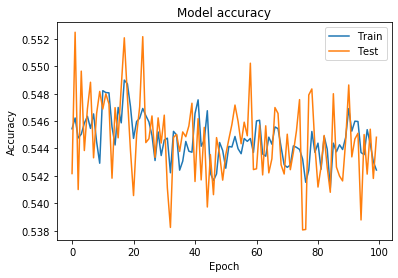

In [30]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

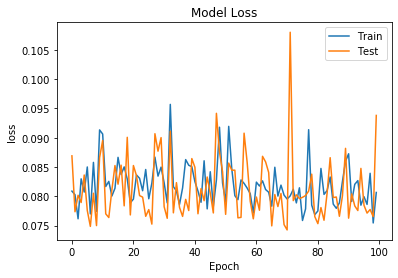

In [31]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [33]:
model = Sequential()
model.add(Dense(12, input_dim=14, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation= 'relu'))
model.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [34]:
hist = model.fit(X_train, y_train,validation_data = (X_test,y_test),batch_size=50, epochs=100)

Train on 120800 samples, validate on 120800 samples
Epoch 1/100
120800/120800 [==============================] - 4s 31us/step - loss: 0.5314 - accuracy: 0.7030 - val_loss: 0.3272 - val_accuracy: 0.7226
Epoch 2/100
120800/120800 [==============================] - 4s 32us/step - loss: 0.3018 - accuracy: 0.7091 - val_loss: 0.3231 - val_accuracy: 0.6852
Epoch 3/100
120800/120800 [==============================] - 4s 32us/step - loss: 0.2776 - accuracy: 0.6942 - val_loss: 0.2499 - val_accuracy: 0.7012
Epoch 4/100
120800/120800 [==============================] - 4s 34us/step - loss: 0.2522 - accuracy: 0.7037 - val_loss: 0.2504 - val_accuracy: 0.7020
Epoch 5/100
120800/120800 [==============================] - 4s 31us/step - loss: 0.2329 - accuracy: 0.7027 - val_loss: 0.2182 - val_accuracy: 0.7114
Epoch 6/100
120800/120800 [==============================] - 4s 33us/step - loss: 0.2023 - accuracy: 0.6887 - val_loss: 0.1829 - val_accuracy: 0.6758
Epoch 7/100
120800/120800 [=====================

Epoch 55/100
120800/120800 [==============================] - 4s 33us/step - loss: 0.1230 - accuracy: 0.5625 - val_loss: 0.1264 - val_accuracy: 0.5681
Epoch 56/100
120800/120800 [==============================] - 4s 37us/step - loss: 0.1172 - accuracy: 0.5645 - val_loss: 0.1331 - val_accuracy: 0.5536
Epoch 57/100
120800/120800 [==============================] - 5s 39us/step - loss: 0.1198 - accuracy: 0.5613 - val_loss: 0.1164 - val_accuracy: 0.5603
Epoch 58/100
120800/120800 [==============================] - 4s 34us/step - loss: 0.1143 - accuracy: 0.5604 - val_loss: 0.1035 - val_accuracy: 0.5654
Epoch 59/100
120800/120800 [==============================] - 4s 34us/step - loss: 0.1263 - accuracy: 0.5564 - val_loss: 0.1240 - val_accuracy: 0.5529
Epoch 60/100
120800/120800 [==============================] - 4s 31us/step - loss: 0.1518 - accuracy: 0.5604 - val_loss: 0.1113 - val_accuracy: 0.5681
Epoch 61/100
120800/120800 [==============================] - 4s 31us/step - loss: 0.1222 - ac

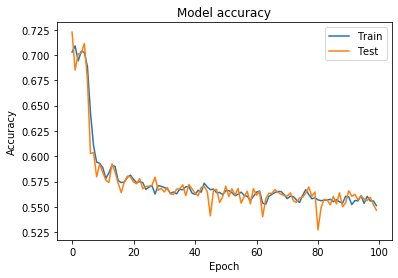

In [35]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

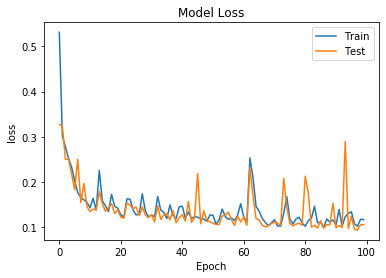

In [36]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [37]:
model = Sequential()
model.add(Dense(12, input_dim=14, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation= 'relu'))
model.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [38]:
hist = model.fit(X_train, y_train,validation_data = (X_test,y_test),batch_size=50, epochs=100)

Train on 120800 samples, validate on 120800 samples
Epoch 1/100
120800/120800 [==============================] - 3s 26us/step - loss: 0.5024 - accuracy: 0.6928 - val_loss: 0.3436 - val_accuracy: 0.7067
Epoch 2/100
120800/120800 [==============================] - 3s 26us/step - loss: 0.3139 - accuracy: 0.7052 - val_loss: 0.2848 - val_accuracy: 0.7047
Epoch 3/100
120800/120800 [==============================] - 3s 25us/step - loss: 0.2711 - accuracy: 0.7089 - val_loss: 0.2526 - val_accuracy: 0.70992725 - ac
Epoch 4/100
120800/120800 [==============================] - 3s 26us/step - loss: 0.2488 - accuracy: 0.7014 - val_loss: 0.2433 - val_accuracy: 0.6814
Epoch 5/100
120800/120800 [==============================] - 3s 27us/step - loss: 0.2127 - accuracy: 0.6794 - val_loss: 0.1947 - val_accuracy: 0.6752
Epoch 6/100
120800/120800 [==============================] - 4s 31us/step - loss: 0.1842 - accuracy: 0.6654 - val_loss: 0.1692 - val_accuracy: 0.6820
Epoch 7/100
120800/120800 [============

Epoch 55/100
120800/120800 [==============================] - 4s 32us/step - loss: 0.1242 - accuracy: 0.5623 - val_loss: 0.1205 - val_accuracy: 0.5474
Epoch 56/100
120800/120800 [==============================] - 4s 34us/step - loss: 0.1602 - accuracy: 0.5556 - val_loss: 0.1278 - val_accuracy: 0.5569
Epoch 57/100
120800/120800 [==============================] - 4s 36us/step - loss: 0.1597 - accuracy: 0.5606 - val_loss: 0.1417 - val_accuracy: 0.5527
Epoch 58/100
120800/120800 [==============================] - 4s 36us/step - loss: 0.1494 - accuracy: 0.5569 - val_loss: 0.1459 - val_accuracy: 0.5638
Epoch 59/100
120800/120800 [==============================] - 4s 36us/step - loss: 0.1592 - accuracy: 0.5634 - val_loss: 0.1491 - val_accuracy: 0.5502
Epoch 60/100
120800/120800 [==============================] - 4s 36us/step - loss: 0.1323 - accuracy: 0.5661 - val_loss: 0.1298 - val_accuracy: 0.5569
Epoch 61/100
120800/120800 [==============================] - 4s 36us/step - loss: 0.1256 - ac

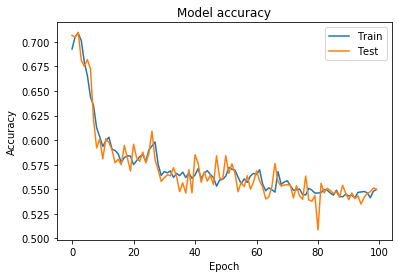

In [39]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

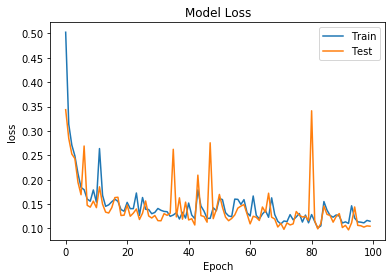

In [40]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [41]:
model = Sequential()
model.add(Dense(12, input_dim=14, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation= 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [42]:
hist = model.fit(X_train, y_train,validation_data = (X_test,y_test),batch_size=50, epochs=100)

Train on 120800 samples, validate on 120800 samples
Epoch 1/100
120800/120800 [==============================] - 3s 23us/step - loss: 0.2957 - accuracy: 0.8706 - val_loss: 0.1775 - val_accuracy: 0.9297
Epoch 2/100
120800/120800 [==============================] - 3s 24us/step - loss: 0.1562 - accuracy: 0.9356 - val_loss: 0.1373 - val_accuracy: 0.9420
Epoch 3/100
120800/120800 [==============================] - 3s 24us/step - loss: 0.1332 - accuracy: 0.9450 - val_loss: 0.1250 - val_accuracy: 0.9474
Epoch 4/100
120800/120800 [==============================] - 3s 23us/step - loss: 0.1230 - accuracy: 0.9484 - val_loss: 0.1201 - val_accuracy: 0.9494
Epoch 5/100
120800/120800 [==============================] - 3s 23us/step - loss: 0.1160 - accuracy: 0.9515 - val_loss: 0.1169 - val_accuracy: 0.9500
Epoch 6/100
120800/120800 [==============================] - 3s 24us/step - loss: 0.1106 - accuracy: 0.9535 - val_loss: 0.1082 - val_accuracy: 0.9554
Epoch 7/100
120800/120800 [=====================

Epoch 55/100
120800/120800 [==============================] - 4s 35us/step - loss: 0.0737 - accuracy: 0.9694 - val_loss: 0.0715 - val_accuracy: 0.9698
Epoch 56/100
120800/120800 [==============================] - 4s 36us/step - loss: 0.0733 - accuracy: 0.9695 - val_loss: 0.0739 - val_accuracy: 0.9692
Epoch 57/100
120800/120800 [==============================] - 4s 37us/step - loss: 0.0734 - accuracy: 0.9693 - val_loss: 0.0748 - val_accuracy: 0.9690
Epoch 58/100
120800/120800 [==============================] - 5s 38us/step - loss: 0.0730 - accuracy: 0.9698 - val_loss: 0.0752 - val_accuracy: 0.9687
Epoch 59/100
120800/120800 [==============================] - 5s 37us/step - loss: 0.0729 - accuracy: 0.9698 - val_loss: 0.0707 - val_accuracy: 0.9705
Epoch 60/100
120800/120800 [==============================] - 4s 36us/step - loss: 0.0729 - accuracy: 0.9698 - val_loss: 0.0697 - val_accuracy: 0.9709
Epoch 61/100
120800/120800 [==============================] - 4s 31us/step - loss: 0.0724 - ac

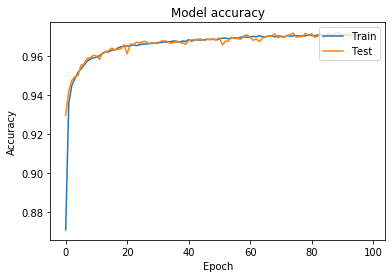

In [43]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

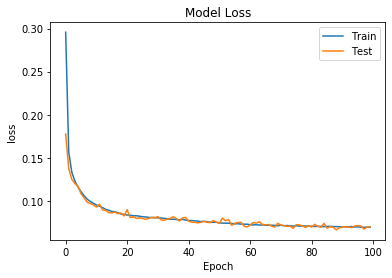

In [44]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [45]:
model = Sequential()
model.add(Dense(12, input_dim=14, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation= 'tanh'))
model.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [46]:
hist = model.fit(X_train, y_train,validation_data = (X_test,y_test),batch_size=50, epochs=100)

Train on 120800 samples, validate on 120800 samples
Epoch 1/100
120800/120800 [==============================] - 3s 25us/step - loss: 0.3863 - accuracy: 0.8236 - val_loss: 0.2748 - val_accuracy: 0.8882
Epoch 2/100
120800/120800 [==============================] - 3s 24us/step - loss: 0.2715 - accuracy: 0.8917 - val_loss: 0.2432 - val_accuracy: 0.9036
Epoch 3/100
120800/120800 [==============================] - 3s 24us/step - loss: 0.2237 - accuracy: 0.9112 - val_loss: 0.2057 - val_accuracy: 0.9200
Epoch 4/100
120800/120800 [==============================] - 3s 25us/step - loss: 0.1960 - accuracy: 0.9227 - val_loss: 0.1860 - val_accuracy: 0.9274
Epoch 5/100
120800/120800 [==============================] - 3s 24us/step - loss: 0.1852 - accuracy: 0.9278 - val_loss: 0.1735 - val_accuracy: 0.9292
Epoch 6/100
120800/120800 [==============================] - 3s 28us/step - loss: 0.1655 - accuracy: 0.9347 - val_loss: 0.1584 - val_accuracy: 0.9381
Epoch 7/100
120800/120800 [=====================

Epoch 55/100
120800/120800 [==============================] - 4s 30us/step - loss: 0.0999 - accuracy: 0.9490 - val_loss: 0.0937 - val_accuracy: 0.9539
Epoch 56/100
120800/120800 [==============================] - 4s 31us/step - loss: 0.0892 - accuracy: 0.9558 - val_loss: 0.0856 - val_accuracy: 0.9598
Epoch 57/100
120800/120800 [==============================] - 4s 32us/step - loss: 0.0912 - accuracy: 0.9575 - val_loss: 0.0925 - val_accuracy: 0.9569
Epoch 58/100
120800/120800 [==============================] - 4s 30us/step - loss: 0.0984 - accuracy: 0.9548 - val_loss: 0.0930 - val_accuracy: 0.9563
Epoch 59/100
120800/120800 [==============================] - 4s 33us/step - loss: 0.0980 - accuracy: 0.9557 - val_loss: 0.0945 - val_accuracy: 0.9610
Epoch 60/100
120800/120800 [==============================] - 4s 31us/step - loss: 0.0940 - accuracy: 0.9573 - val_loss: 0.0870 - val_accuracy: 0.9582
Epoch 61/100
120800/120800 [==============================] - 4s 33us/step - loss: 0.0884 - ac

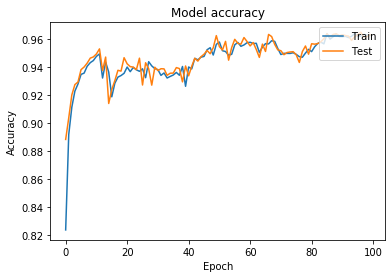

In [47]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

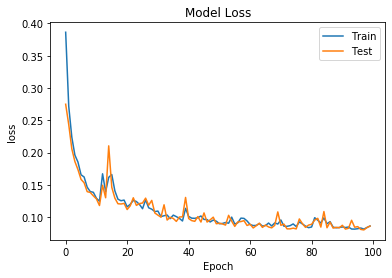

In [48]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [49]:
model = Sequential()
model.add(Dense(12, input_dim=14, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation= 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [50]:
hist = model.fit(X_train, y_train,validation_data = (X_test,y_test),batch_size=50, epochs=100)

Train on 120800 samples, validate on 120800 samples
Epoch 1/100
120800/120800 [==============================] - 3s 23us/step - loss: 0.3434 - accuracy: 0.8402 - val_loss: 0.2320 - val_accuracy: 0.9008
Epoch 2/100
120800/120800 [==============================] - 3s 21us/step - loss: 0.2006 - accuracy: 0.9156 - val_loss: 0.1702 - val_accuracy: 0.9299
Epoch 3/100
120800/120800 [==============================] - 3s 23us/step - loss: 0.1539 - accuracy: 0.9369 - val_loss: 0.1384 - val_accuracy: 0.9433
Epoch 4/100
120800/120800 [==============================] - 4s 29us/step - loss: 0.1332 - accuracy: 0.9448 - val_loss: 0.1251 - val_accuracy: 0.9486
Epoch 5/100
120800/120800 [==============================] - 4s 33us/step - loss: 0.1226 - accuracy: 0.9489 - val_loss: 0.1175 - val_accuracy: 0.9507
Epoch 6/100
120800/120800 [==============================] - 4s 29us/step - loss: 0.1151 - accuracy: 0.9520 - val_loss: 0.1103 - val_accuracy: 0.9541
Epoch 7/100
120800/120800 [=====================

Epoch 55/100
120800/120800 [==============================] - 4s 32us/step - loss: 0.0754 - accuracy: 0.9688 - val_loss: 0.0739 - val_accuracy: 0.9699
Epoch 56/100
120800/120800 [==============================] - 4s 32us/step - loss: 0.0750 - accuracy: 0.9692 - val_loss: 0.0763 - val_accuracy: 0.9688
Epoch 57/100
120800/120800 [==============================] - 4s 29us/step - loss: 0.0749 - accuracy: 0.9691 - val_loss: 0.0780 - val_accuracy: 0.9678
Epoch 58/100
120800/120800 [==============================] - 3s 29us/step - loss: 0.0746 - accuracy: 0.9692 - val_loss: 0.0758 - val_accuracy: 0.9686
Epoch 59/100
120800/120800 [==============================] - 4s 30us/step - loss: 0.0743 - accuracy: 0.9695 - val_loss: 0.0792 - val_accuracy: 0.9672
Epoch 60/100
120800/120800 [==============================] - 3s 29us/step - loss: 0.0747 - accuracy: 0.9688 - val_loss: 0.0744 - val_accuracy: 0.9700
Epoch 61/100
120800/120800 [==============================] - 3s 29us/step - loss: 0.0744 - ac

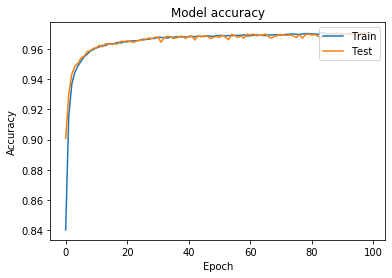

In [51]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

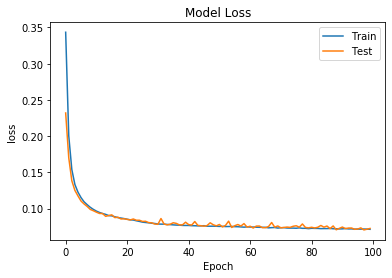

In [52]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [53]:
model = Sequential()
model.add(Dense(12, input_dim=14, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation= 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [54]:
hist = model.fit(X_train, y_train,validation_data = (X_test,y_test),batch_size=50, epochs=100)

Train on 120800 samples, validate on 120800 samples
Epoch 1/100
120800/120800 [==============================] - 3s 24us/step - loss: 0.3144 - accuracy: 0.8605 - val_loss: 0.2048 - val_accuracy: 0.9183
Epoch 2/100
120800/120800 [==============================] - 3s 25us/step - loss: 0.1814 - accuracy: 0.9245 - val_loss: 0.1606 - val_accuracy: 0.9321
Epoch 3/100
120800/120800 [==============================] - 3s 25us/step - loss: 0.1500 - accuracy: 0.9364 - val_loss: 0.1376 - val_accuracy: 0.9412
Epoch 4/100
120800/120800 [==============================] - 3s 26us/step - loss: 0.1304 - accuracy: 0.9452 - val_loss: 0.1229 - val_accuracy: 0.9487
Epoch 5/100
120800/120800 [==============================] - 3s 26us/step - loss: 0.1191 - accuracy: 0.9502 - val_loss: 0.1128 - val_accuracy: 0.9540
Epoch 6/100
120800/120800 [==============================] - 3s 28us/step - loss: 0.1107 - accuracy: 0.9547 - val_loss: 0.1061 - val_accuracy: 0.9567
Epoch 7/100
120800/120800 [=====================

Epoch 55/100
120800/120800 [==============================] - 3s 28us/step - loss: 0.0692 - accuracy: 0.9724 - val_loss: 0.0672 - val_accuracy: 0.9734
Epoch 56/100
120800/120800 [==============================] - 3s 28us/step - loss: 0.0692 - accuracy: 0.9724 - val_loss: 0.0697 - val_accuracy: 0.9720
Epoch 57/100
120800/120800 [==============================] - 3s 29us/step - loss: 0.0689 - accuracy: 0.9723 - val_loss: 0.0693 - val_accuracy: 0.9721
Epoch 58/100
120800/120800 [==============================] - 3s 28us/step - loss: 0.0691 - accuracy: 0.9719 - val_loss: 0.0677 - val_accuracy: 0.9729
Epoch 59/100
120800/120800 [==============================] - 3s 28us/step - loss: 0.0691 - accuracy: 0.9725 - val_loss: 0.0696 - val_accuracy: 0.9718
Epoch 60/100
120800/120800 [==============================] - 3s 28us/step - loss: 0.0693 - accuracy: 0.9721 - val_loss: 0.0676 - val_accuracy: 0.9725
Epoch 61/100
120800/120800 [==============================] - 4s 29us/step - loss: 0.0691 - ac

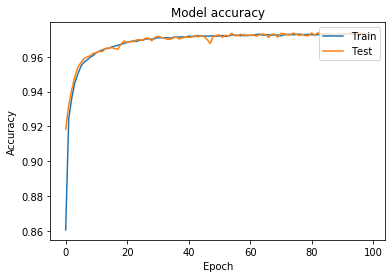

In [55]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

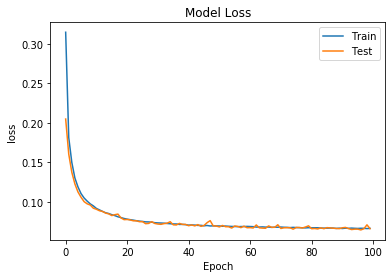

In [56]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [57]:
model = Sequential()
model.add(Dense(16, input_dim=14, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation= 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [58]:
hist = model.fit(X_train, y_train,validation_data = (X_test,y_test),batch_size=50, epochs=100)

Train on 120800 samples, validate on 120800 samples
Epoch 1/100
120800/120800 [==============================] - 3s 24us/step - loss: 0.3112 - accuracy: 0.8617 - val_loss: 0.2047 - val_accuracy: 0.9172
Epoch 2/100
120800/120800 [==============================] - 3s 24us/step - loss: 0.1763 - accuracy: 0.9272 - val_loss: 0.1521 - val_accuracy: 0.9353
Epoch 3/100
120800/120800 [==============================] - 4s 32us/step - loss: 0.1394 - accuracy: 0.9413 - val_loss: 0.1283 - val_accuracy: 0.9456
Epoch 4/100
120800/120800 [==============================] - 4s 32us/step - loss: 0.1196 - accuracy: 0.9504 - val_loss: 0.1110 - val_accuracy: 0.9534
Epoch 5/100
120800/120800 [==============================] - 4s 31us/step - loss: 0.1081 - accuracy: 0.9559 - val_loss: 0.1022 - val_accuracy: 0.9578
Epoch 6/100
120800/120800 [==============================] - 3s 29us/step - loss: 0.1006 - accuracy: 0.9593 - val_loss: 0.1008 - val_accuracy: 0.9574
Epoch 7/100
120800/120800 [=====================

Epoch 55/100
120800/120800 [==============================] - 4s 30us/step - loss: 0.0660 - accuracy: 0.9730 - val_loss: 0.0678 - val_accuracy: 0.9717
Epoch 56/100
120800/120800 [==============================] - 3s 28us/step - loss: 0.0665 - accuracy: 0.9728 - val_loss: 0.0651 - val_accuracy: 0.9738
Epoch 57/100
120800/120800 [==============================] - 4s 30us/step - loss: 0.0661 - accuracy: 0.9733 - val_loss: 0.0652 - val_accuracy: 0.9732
Epoch 58/100
120800/120800 [==============================] - 3s 28us/step - loss: 0.0662 - accuracy: 0.9731 - val_loss: 0.0668 - val_accuracy: 0.9720
Epoch 59/100
120800/120800 [==============================] - 4s 29us/step - loss: 0.0661 - accuracy: 0.9730 - val_loss: 0.0675 - val_accuracy: 0.9722
Epoch 60/100
120800/120800 [==============================] - 3s 29us/step - loss: 0.0659 - accuracy: 0.9729 - val_loss: 0.0667 - val_accuracy: 0.9731
Epoch 61/100
120800/120800 [==============================] - 4s 30us/step - loss: 0.0658 - ac

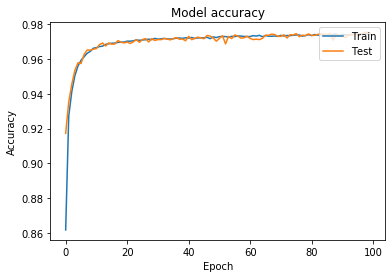

In [59]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

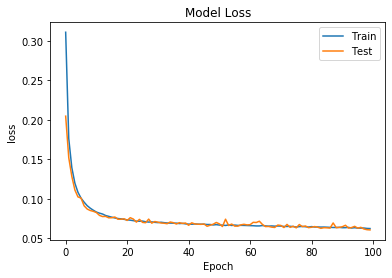

In [60]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [61]:
#importing the dataset

data = pd.read_csv("heart.csv")
print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [68]:
# defining feature matrix(X) and response vector(y) 
X = data.iloc[:, 0:13]
y = data["target"]

# splitting X and y into training and testing sets 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=10) 

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [69]:
X_train.shape

(212, 13)

In [80]:
model = Sequential()
model.add(Dense(12, input_dim=13, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation= 'relu'))
model.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [81]:
hist = model.fit(X_train, y_train,validation_data = (X_test,y_test),batch_size=57, epochs=100)

Train on 212 samples, validate on 91 samples
Epoch 1/100
212/212 [==============================] - 0s 452us/step - loss: 0.9228 - accuracy: 0.5896 - val_loss: 1.5035 - val_accuracy: 0.5275
Epoch 2/100
212/212 [==============================] - 0s 28us/step - loss: 0.8633 - accuracy: 0.6085 - val_loss: 1.4885 - val_accuracy: 0.5495
Epoch 3/100
212/212 [==============================] - 0s 33us/step - loss: 0.7781 - accuracy: 0.6226 - val_loss: 1.5671 - val_accuracy: 0.5495
Epoch 4/100
212/212 [==============================] - 0s 24us/step - loss: 0.7381 - accuracy: 0.6321 - val_loss: 1.5425 - val_accuracy: 0.5714
Epoch 5/100
212/212 [==============================] - 0s 24us/step - loss: 0.7132 - accuracy: 0.6651 - val_loss: 1.5232 - val_accuracy: 0.5824
Epoch 6/100
212/212 [==============================] - 0s 42us/step - loss: 0.6906 - accuracy: 0.6981 - val_loss: 1.3928 - val_accuracy: 0.6044
Epoch 7/100
212/212 [==============================] - 0s 28us/step - loss: 0.6225 - accur

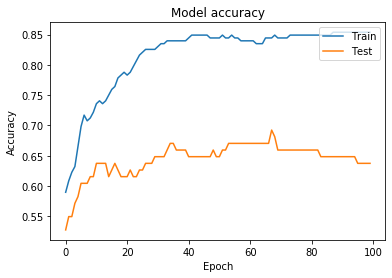

In [82]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

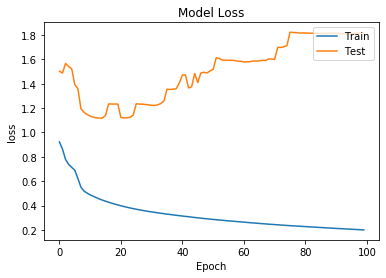

In [83]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [84]:
model = Sequential()
model.add(Dense(12, input_dim=13, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation= 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [85]:
hist = model.fit(X_train, y_train,validation_data = (X_test,y_test),batch_size=57, epochs=100)

Train on 212 samples, validate on 91 samples
Epoch 1/100
212/212 [==============================] - 0s 447us/step - loss: 0.6693 - accuracy: 0.5896 - val_loss: 0.7171 - val_accuracy: 0.4615
Epoch 2/100
212/212 [==============================] - 0s 28us/step - loss: 0.6552 - accuracy: 0.5849 - val_loss: 0.7027 - val_accuracy: 0.4835
Epoch 3/100
212/212 [==============================] - 0s 28us/step - loss: 0.6422 - accuracy: 0.5943 - val_loss: 0.6895 - val_accuracy: 0.5165
Epoch 4/100
212/212 [==============================] - 0s 28us/step - loss: 0.6292 - accuracy: 0.5896 - val_loss: 0.6779 - val_accuracy: 0.5275
Epoch 5/100
212/212 [==============================] - 0s 28us/step - loss: 0.6174 - accuracy: 0.5943 - val_loss: 0.6673 - val_accuracy: 0.5385
Epoch 6/100
212/212 [==============================] - 0s 28us/step - loss: 0.6055 - accuracy: 0.6226 - val_loss: 0.6569 - val_accuracy: 0.5385
Epoch 7/100
212/212 [==============================] - 0s 24us/step - loss: 0.5944 - accur

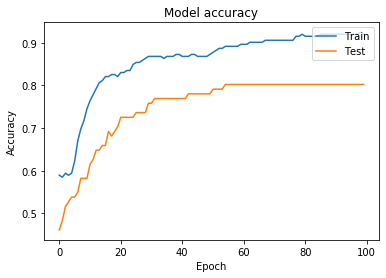

In [86]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

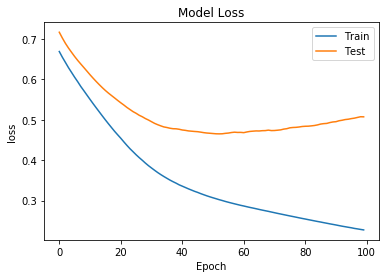

In [87]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show() 

In [88]:
model = Sequential()
model.add(Dense(12, input_dim=13, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation= 'tanh'))
model.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [89]:
hist = model.fit(X_train, y_train,validation_data = (X_test,y_test),batch_size=57, epochs=100)

Train on 212 samples, validate on 91 samples
Epoch 1/100
212/212 [==============================] - 0s 438us/step - loss: 2.0152 - accuracy: 0.3962 - val_loss: 1.9648 - val_accuracy: 0.4286
Epoch 2/100
212/212 [==============================] - 0s 24us/step - loss: 1.9495 - accuracy: 0.4198 - val_loss: 1.9274 - val_accuracy: 0.4396
Epoch 3/100
212/212 [==============================] - 0s 28us/step - loss: 1.9042 - accuracy: 0.4340 - val_loss: 1.7629 - val_accuracy: 0.4615
Epoch 4/100
212/212 [==============================] - 0s 38us/step - loss: 1.8664 - accuracy: 0.4481 - val_loss: 1.7288 - val_accuracy: 0.4725
Epoch 5/100
212/212 [==============================] - 0s 33us/step - loss: 1.8319 - accuracy: 0.4623 - val_loss: 1.7018 - val_accuracy: 0.4835
Epoch 6/100
212/212 [==============================] - 0s 24us/step - loss: 1.8003 - accuracy: 0.4764 - val_loss: 1.6787 - val_accuracy: 0.5275
Epoch 7/100
212/212 [==============================] - 0s 28us/step - loss: 1.7295 - accur

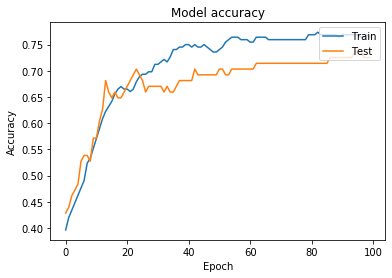

In [90]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

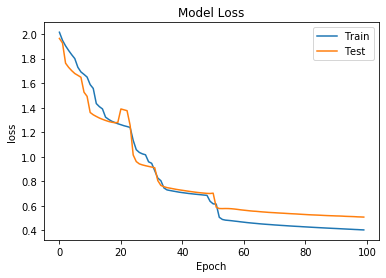

In [91]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show() 

In [92]:
model = Sequential()
model.add(Dense(12, input_dim=13, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation= 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [93]:
hist = model.fit(X_train, y_train,validation_data = (X_test,y_test),batch_size=57, epochs=100)

Train on 212 samples, validate on 91 samples
Epoch 1/100
212/212 [==============================] - 0s 504us/step - loss: 0.7423 - accuracy: 0.4198 - val_loss: 0.6926 - val_accuracy: 0.5495
Epoch 2/100
212/212 [==============================] - 0s 24us/step - loss: 0.7287 - accuracy: 0.4198 - val_loss: 0.6855 - val_accuracy: 0.5495
Epoch 3/100
212/212 [==============================] - 0s 38us/step - loss: 0.7175 - accuracy: 0.4198 - val_loss: 0.6793 - val_accuracy: 0.5495
Epoch 4/100
212/212 [==============================] - 0s 38us/step - loss: 0.7074 - accuracy: 0.4245 - val_loss: 0.6739 - val_accuracy: 0.5495
Epoch 5/100
212/212 [==============================] - 0s 28us/step - loss: 0.6992 - accuracy: 0.4340 - val_loss: 0.6691 - val_accuracy: 0.5714
Epoch 6/100
212/212 [==============================] - 0s 33us/step - loss: 0.6917 - accuracy: 0.4528 - val_loss: 0.6647 - val_accuracy: 0.5714
Epoch 7/100
212/212 [==============================] - 0s 28us/step - loss: 0.6855 - accur

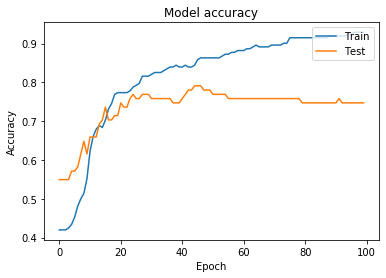

In [94]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

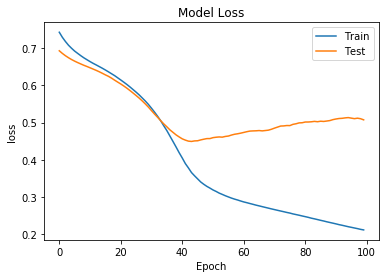

In [95]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show() 

In [96]:
model = Sequential()
model.add(Dense(12, input_dim=13, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation= 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [97]:
hist = model.fit(X_train, y_train,validation_data = (X_test,y_test),batch_size=57, epochs=100)

Train on 212 samples, validate on 91 samples
Epoch 1/100
212/212 [==============================] - 0s 567us/step - loss: 0.6922 - accuracy: 0.5943 - val_loss: 0.6852 - val_accuracy: 0.6264
Epoch 2/100
212/212 [==============================] - 0s 28us/step - loss: 0.6869 - accuracy: 0.6604 - val_loss: 0.6841 - val_accuracy: 0.6484
Epoch 3/100
212/212 [==============================] - 0s 23us/step - loss: 0.6820 - accuracy: 0.6981 - val_loss: 0.6832 - val_accuracy: 0.6374
Epoch 4/100
212/212 [==============================] - 0s 38us/step - loss: 0.6775 - accuracy: 0.6792 - val_loss: 0.6819 - val_accuracy: 0.6374
Epoch 5/100
212/212 [==============================] - 0s 28us/step - loss: 0.6727 - accuracy: 0.7028 - val_loss: 0.6801 - val_accuracy: 0.6154
Epoch 6/100
212/212 [==============================] - 0s 24us/step - loss: 0.6672 - accuracy: 0.7264 - val_loss: 0.6774 - val_accuracy: 0.6154
Epoch 7/100
212/212 [==============================] - 0s 33us/step - loss: 0.6615 - accur

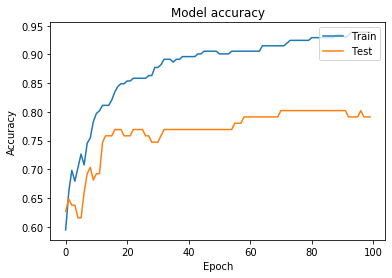

In [98]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

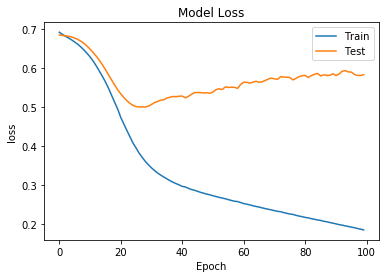

In [99]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show() 